## Train a KNN model
The purpose of this notebook is to create a machine learning model that predicts a species of iris given the shape of its petals.
We are going to follow the [sklearn tutorial on this subject](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
import pickle as pkl
import pandas as pd
import numpy as np

## Load in the data
We created a Pandas-friendly copy of the dataset in a previous notebook

In [2]:
data = pd.read_csv('data/clean/iris.csv')
print(f'Loaded a dataset with {len(data)} entries')

Loaded a dataset with 150 entries


## Train a model
Let's train a SVM model using linear functions, nice and simple to demonstrate how it works.

In [3]:
model = svm.SVC(kernel="linear", C=1.0)
model

SVC(kernel='linear')

Fit it on 75% of the data, test on the remainder. Use stratified splits so that 

In [4]:
train_data, test_data = train_test_split(data, test_size=0.25, stratify=data['class_id'])
print(f'Split data into {len(train_data)} training points and {len(test_data)} test.')

Split data into 112 training points and 38 test.


Fit the model

In [5]:
model.fit(train_data[['sepal_width', 'sepal_length']].values, train_data['class_id'])

SVC(kernel='linear')

We now have a trained model. Time to test it

## Visualize the model performance
I want to see two figures: one that shows me the predictions visually and another that gives me an idea of the performance.
I'll use a plot of the test points and the model predictions as a function of the two inputs, and a confusion matrix.

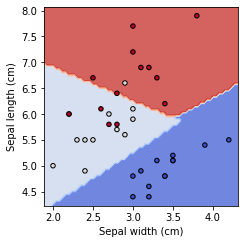

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))

# Plot the points on the graph
ax.scatter(test_data["sepal_width"], test_data["sepal_length"], c=test_data["class_id"],
           cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlabel("Sepal width (cm)")
ax.set_ylabel("Sepal length (cm)")

# Plot the predictions as backdrop
xx, yy = np.meshgrid(
    np.linspace(*ax.get_xlim(), 64),
    np.linspace(*ax.get_ylim(), 64)
)
coords = np.column_stack((xx.flatten(), yy.flatten()))
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
pred = model.predict(coords)
zz = np.reshape(pred, xx.shape)
ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8, zorder=-1)

fig.tight_layout()
fig.savefig('figures/classification-plot.png', dpi=320)
fig.savefig('figures/classification-plot.pdf', dpi=320)

We can see that the model does a great job in separating the blue class, but is not as good with red and white.

In [7]:
# Get reasonable labels first
labels = test_data.sort_values('class_id').drop_duplicates('class_id')['class'].tolist()
labels = [x.split("-")[1] for x in labels]
print(f'Got {len(labels)} labels: {labels}')

Got 3 labels: ['setosa', 'versicolor', 'virginica']


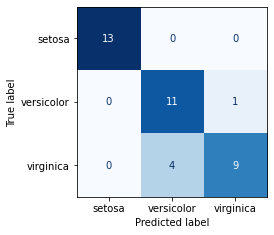

In [10]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))

ConfusionMatrixDisplay.from_estimator(model, test_data[['sepal_width', 'sepal_length']].values, test_data['class_id'], 
                                      display_labels=labels, ax=ax, cmap='Blues', colorbar=False)

Given this plot, we can indeed see that the misclassification is between only two classes and they are "versicolor" and "virginica."

## Save the model
We're done training the model, so let's save it for later use. We'll use pickle, as that is [the preferred form for sklearn.](https://scikit-learn.org/stable/modules/model_persistence.html)

In [9]:
with open('model.pkl', 'wb') as fp:
    pkl.dump(model, fp)